In [142]:
import os
import sys

from typing import List, Tuple
from pandas import read_csv
import pandas as pd
import random
import numpy as np
from bokeh.io import output_notebook, show, push_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Div, Select, Slider, TextInput
from bokeh.plotting import figure as bokeh_figure
from os.path import dirname, join
from bokeh.models import HelpTool, HoverTool
from bokeh.palettes import Category20c
from bokeh.transform import factor_cmap
from bokeh.transform import cumsum
from bokeh.models import FactorRange
from bokeh.transform import dodge
from bokeh.models import Panel, Tabs
from bokeh.layouts import column, row
from bokeh.models import Dropdown
from bokeh.palettes import RdYlBu3
from bokeh.palettes import Category20c

from bokeh.plotting import curdoc
from bokeh.models import ColumnDataSource, Div, Select
from bokeh.plotting import figure as bokeh_figure
from bokeh.models import CheckboxButtonGroup, CustomJS
from bokeh.models import MultiChoice
from bokeh.models import Paragraph
from masci_tools.vis.bokeh_plots import bokeh_scatter, bokeh_multi_scatter, bokeh_line
sys.path.append(".")


In [143]:
from analysis import filter_dataframe, calculate_crosstab
#from analysis import prepare_data_research_field
output_notebook()

Loading BokehJS ...

In [146]:
pwd = os.getcwd()
datafilepath_raw = join(pwd, './data/hmc_survey_2021_data_cleaned-csv')
datafilepath= join(pwd, './data/hmc_survey_2021_data_cleaned-csv')
surveydata = read_csv(datafilepath)

In [147]:
q1_key = 'careerLevel'
q2_key = 'docStructured'
df1 = calculate_crosstab(surveydata, q1_key, q2_key) 
df1

KeyError: "None of [Index(['careerLevel', 'docStructured'], dtype='object')] are in the [columns]"

In [8]:
list(df1['careerLevel'].value_counts().keys())

['Director (of the institute)',
 'Other',
 'PhD student',
 'Postdoc',
 'Principal Investigator',
 'Research associate',
 'Undergraduate / Masters student']

In [9]:
all_values = {}
for key in surveydata.keys():
    all_values[key] = list(surveydata[key].value_counts().keys())

In [10]:
all_values

{'Unnamed: 0.2': [0,
  678,
  665,
  666,
  667,
  668,
  669,
  670,
  671,
  672,
  673,
  674,
  675,
  676,
  677,
  679,
  663,
  680,
  681,
  682,
  683,
  684,
  685,
  686,
  687,
  688,
  689,
  690,
  691,
  692,
  664,
  662,
  505,
  646,
  633,
  634,
  635,
  636,
  637,
  638,
  639,
  640,
  641,
  642,
  643,
  644,
  645,
  647,
  661,
  648,
  649,
  650,
  651,
  652,
  653,
  654,
  655,
  656,
  657,
  658,
  659,
  660,
  693,
  694,
  695,
  741,
  728,
  729,
  730,
  731,
  732,
  733,
  734,
  735,
  736,
  737,
  738,
  739,
  740,
  742,
  696,
  743,
  744,
  745,
  746,
  747,
  748,
  749,
  750,
  751,
  752,
  753,
  754,
  755,
  727,
  726,
  725,
  724,
  697,
  698,
  699,
  700,
  701,
  702,
  703,
  704,
  705,
  706,
  707,
  708,
  709,
  710,
  711,
  712,
  713,
  714,
  715,
  716,
  717,
  718,
  719,
  720,
  721,
  722,
  723,
  632,
  631,
  630,
  551,
  538,
  539,
  540,
  541,
  542,
  543,
  544,
  545,
  546,
  547,
  548,
  549,

In [11]:
import math
df1['markersize'] = [2*math.sqrt(val/math.pi) for val in df1['percentage']]

In [12]:
selected = ColumnDataSource(df1)

In [13]:
df1.describe()

,value,total,percentage,markersize
count,21.000000,21.000000,21.000000,21.000000
mean,24.333333,112.714286,20.461931,4.896461
std,22.423946,82.636640,10.751577,1.476986
min,1.000000,22.000000,3.076923,1.979308
25%,6.000000,24.000000,13.636364,4.166816
50%,20.000000,128.000000,20.000000,5.046265
75%,32.000000,148.000000,26.351351,5.792373
max,90.000000,272.000000,41.666667,7.283656


In [136]:
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter)
from bokeh.transform import transform
from bokeh.models import Legend, Circle, LegendItem

default_tooltips = [("careerLevel", "@careerLevel"), 
                    ("docStructured", "@docStructured"),
                  ("total", "@total"),
                  ("percentage", "@percentage")]

def bokeh_corr_plot(source, x='value', y='counts',  figure=None, title='', x_range=None, y_range=None, 
                    markersize='markersize',  xlabel='Answers', ylabel='Number of answers', 
                    alpha=None, tooltips=default_tooltips, fill_color='#A0235A', **kwargs):
    """Plot an interactive circle with bokeh"""
    

    fig = bokeh_figure(height=600, width=900,
               title='title',
               toolbar_location='above',
               tools='hover,wheel_zoom,box_zoom,undo,reset,save',
                  y_range=y_range, x_range=x_range, tooltips=tooltips)

    circle = fig.circle(source=selected, x='careerLevel', y='docStructured', size='percentage', alpha=0.6, 
                        hover_alpha=1.0, line_color=fill_color, fill_color=fill_color, 
           hover_line_color='black', hover_line_width=5)#radius=0.1,
    fig.xaxis.major_label_orientation = 1
    fig.xaxis.axis_line_alpha= 0
    fig.yaxis.axis_line_alpha= 0
    
    #legend = Legend(
    #    title="Rel. amount\nof answers [%]",
    #    items=leg_items,
    #    location='top', orientation='vertical',
    #    border_line_color=None,
    #    title_text_font_size = '14px',
    #    title_text_font_style = 'bold'
    #)
    

    return fig
"""
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
       text_font_size="9px", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color),
       text_font_size="12px", text_align="left", text_baseline="middle")
"""

def create_legend_items(number, size_min, color, fig):
    leg_items = []
    step = int(100/(number-1))
    size = size_min
    alpha_min = 0.2
    offset = 5
    y = -50
    y_step = int((600+2*y)/number)
    for i in range(number):
        
        circ = fig.circle(size=0.1+size*0.5, x=2.0, y=y, fill_color=color[i], name='foo')
        txt = fig.text(text=[f'{size}'], x=2.0+offset, y=y, text_font_size="22px", 
                       text_align="left", text_baseline="middle")
        y = y - y_step
        size = size + step
        leg_items.append(circ)
        leg_items.append(txt)
    return leg_items

def create_legend(fig, colors = ['red', 'blue', 'green', 'red', 'red', 'red']
):
    fig2 = bokeh_figure(height=600, width=200,
               title="Rel. amount\nof answers [%]",
               toolbar_location=None,
               tools='')
    leg_items = create_legend_items(5, size_min=0, color=colors, fig=fig2) #[("circle", [circle])]

    fig2.xaxis.axis_line_alpha= 0
    fig2.yaxis.axis_line_alpha= 0
    return fig2

In [137]:
y_range= ['No', 'I am not sure', 'Yes']
x_range= ['Director (of the institute)',
 'Other',
 'PhD student',
 'Postdoc',
 'Principal Investigator',
 'Research associate',
 'Undergraduate / Masters student']
fig = bokeh_corr_plot(source=selected, x='careerLevel', y='docStructured', markersize='markersize', 
                      x_range=x_range, y_range=y_range)
show(fig)

In [124]:
fig2 = create_legend(fig)
show(fig2)

In [126]:
fig2.xgrid.grid_line_alpha = 0
fig2.ygrid.grid_line_alpha = 0
fig2.xaxis.axis_label_text_alpha = 0
fig2.border_fill_alpha = 0
fig2.xaxis.major_label_text_alpha = 0
fig2.yaxis.major_label_text_alpha = 0
fig2.x_range.start = 0.0
fig2.x_range.end = 200
fig2.y_range.start = -600.0
fig2.y_range.end = 0.0
fig2.xaxis.minor_tick_line_alpha = 0
fig2.xaxis.major_tick_line_alpha = 0
fig2.yaxis.minor_tick_line_alpha = 0
fig2.yaxis.major_tick_line_alpha = 0
show(fig2)

In [127]:
fig.add_layout(fig2, 'right')

ValueError: failed to validate figure(id='20183', ...).right: expected an element of List(Instance(Renderer)), got seq with invalid items [figure(id='21113', ...)]

In [129]:
from bokeh.client import logging

In [130]:
logging?

In [112]:
a = fig.legend.items[3].renderers[0]

AttributeError: Trying to access 'items' attribute on an empty 'splattable' list

In [71]:
def hmc_barchart_style(fig: bokeh.models.figure, figure_kwargs: dict={}) -> bokeh.models.figure:
    """
    Define some figure properties for HMC dashboard barcharts
    """
    #def apply_property(fig, pro_val, pro_key):
    #    fig.

    fig.x_range.range_padding = 0.1
    fig.xgrid.grid_line_color = None
    fig.legend.location = "top_left"
    fig.legend.orientation = "horizontal"
    fig.y_range.start = 0
    fig.xaxis.major_label_orientation = 1
    fig.yaxis.axis_label = ylabel
    fig.xaxis.axis_label = xlabel
    fig.title.text_font_size='25px'
    fig.yaxis.axis_label_text_font_size = '22px'
    fig.xaxis.axis_label_text_font_size = '22px'
    fig.xaxis.major_label_text_font_size = '18px'
    fig.xaxis.major_label_text_font_size = '18px'
    fig.toolbar.logo = None
    fig.legend.location = "top_right"
    fig.legend.orientation = "vertical"
    fig.legend.click_policy="hide"
    }
    


    return figure_kwargs


SyntaxError: unmatched '}' (3966699803.py, line 25)

In [ ]:
def apply_property(fig, pro_key, pro_val):
    if '.' in pro_key:
        pro_key_new = pro_key.split('.')[]
        apply_property(un_object, pro_key_new, pro_val)
    else:
        fig.set_from_json(pro_key, pro_val)
    return fig

In [ ]:
fig =apply_property(fig, 'title', "top_left")

In [ ]:
show(fig)

In [ ]:

y_range= ['No', 'I am not sure', 'Yes']
x_range= ['Director (of the institute)',
 'Other',
 'PhD student',
 'Postdoc',
 'Principal Investigator',
 'Research associate',
 'Undergraduate / Masters student']
fig = bokeh_figure(height=600, width=900,
               title='title',
               toolbar_location='above',
               tools='hover,wheel_zoom,box_zoom,undo,reset,save',
                  y_range=y_range, x_range=x_range)

circle = fig.circle(source=selected, x='careerLevel', y='docStructured', size='percentage', alpha=0.6, hover_alpha=1.0, 
           hover_line_color='black', hover_line_width=5)#radius=0.1,
fig.xaxis.major_label_orientation = 1
fig.xaxis.axis_line_alpha= 0
fig.yaxis.axis_line_alpha= 0

def create_legend_items(number, size_min, color):
    leg_items = []
    step = int(100/(number-1))
    size = size_min
    alpha_min = 0.2
    for i in range(number):
        circ = fig.circle(radius=size, fill_color=color[i], name='foo')
        leg_items.append((f'{size}', [circ]))
        size = size + step
    
    return leg_items

colors = ['red', 'blue', 'green', 'red', 'red', 'red']
leg_items = create_legend_items(5, size_min=0, color=colors) #[("circle", [circle])]
legend = Legend(
        title="Rel. amount\nof answers [%]",
        items=leg_items,
        location='top', orientation='vertical',
        border_line_color=None,
        title_text_font_size = '14px',
        title_text_font_style = 'bold'
)
fig.add_layout(legend, 'right')
show(fig)

In [ ]:
a = legend.items[0]


In [ ]:
a

In [ ]:
legend.title

In [ ]:
fig = bokeh_corr_plot(source=selected, x='careerLevel', y='docStructured', markersize='percentage')
show(fig)

In [152]:
bar_list = []
columns = HCS_colnamesDict.keys()
for ent in list(HCSquestions['EN'].keys()):
    if ent in columns:
        question = ent
        bar_list.append(HCS_colnamesDict[question])
    else: # For some entry the same question applies
        # multiple choice questions end with an_
        avail = []
        for col in columns:
            if ent in col:
                avail.append(col)
        print(ent, len(avail), avail)
    


RSDP1 17 ['RSDP1_1A2', 'RSDP1_3A4', 'RSDP1b_1', 'RSDP1c_1', 'RSDP1c_2', 'RSDP1c_3', 'RSDP1c_4', 'RSDP1c_5', 'RSDP1c_6', 'RSDP1c_7', 'RSDP1c_8', 'RSDP1c_9', 'RSDP1c_10', 'RSDP1c_11', 'RSDP1c_other', 'RSDP11', 'RSDP10']
RSDP1c 12 ['RSDP1c_1', 'RSDP1c_2', 'RSDP1c_3', 'RSDP1c_4', 'RSDP1c_5', 'RSDP1c_6', 'RSDP1c_7', 'RSDP1c_8', 'RSDP1c_9', 'RSDP1c_10', 'RSDP1c_11', 'RSDP1c_other']
RSDP2 28 ['RSDP2_1', 'RSDP2_2', 'RSDP2_3', 'RSDP2_4', 'RSDP2_5', 'RSDP2_6', 'RSDP2_other', 'RSDP2b_1_1', 'RSDP2b_1_2', 'RSDP2b_1_3', 'RSDP2b_2_1', 'RSDP2b_2_2', 'RSDP2b_2_3', 'RSDP2b_3_1', 'RSDP2b_3_2', 'RSDP2b_3_3', 'RSDP2b_4_1', 'RSDP2b_4_2', 'RSDP2b_4_3', 'RSDP2b_5_1', 'RSDP2b_5_2', 'RSDP2b_5_3', 'RSDP2b_6_1', 'RSDP2b_6_2', 'RSDP2b_6_3', 'RSDP2b_7_1', 'RSDP2b_7_2', 'RSDP2b_7_3']
RSDP2b 21 ['RSDP2b_1_1', 'RSDP2b_1_2', 'RSDP2b_1_3', 'RSDP2b_2_1', 'RSDP2b_2_2', 'RSDP2b_2_3', 'RSDP2b_3_1', 'RSDP2b_3_2', 'RSDP2b_3_3', 'RSDP2b_4_1', 'RSDP2b_4_2', 'RSDP2b_4_3', 'RSDP2b_5_1', 'RSDP2b_5_2', 'RSDP2b_5_3', 'RSDP2b_6_1', '

In [154]:
bar_list

['centerAffiliation',
 'researchFieldHGF',
 'researchArea',
 'yearsInResearch',
 'careerLevel',
 'orcid',
 'fairFamiliarity',
 'dataAmount_lsf',
 'dataInPublication',
 'dataGatherTime',
 'experimentDuration_sub',
 'dataAnalDuration_sub',
 'longtermStorage',
 'pubAmount',
 'docStructured',
 'docDefSchema',
 'feedback']

In [155]:
len(bar_list)

17

In [74]:
import panel as pn
pn.extension()

In [13]:
text = """
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt
ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation 
ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in
reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.
Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt
mollit anim id est laborum.
"""
text2 = """
Lorem ipsum d.
"""
a = pn.Column(
    '# Lorem Ipsum',
    pn.layout.Divider(),
    text,
    background='whitesmoke', width=400
)

In [14]:
a.objects[2] = text2

In [77]:
 a = {'dataGenMethod_1':"imaging",
                              'dataGenMethod_2':"analytical methods",
                              'dataGenMethod_3':"simulations",
                              'dataGenMethod_4':"sample synthesis \n and preparation",
                              'dataGenMethod_5':"cohort studies",
                              'dataGenMethod_6':"recordings"
                              }

In [78]:
list(a.keys())

['dataGenMethod_1',
 'dataGenMethod_2',
 'dataGenMethod_3',
 'dataGenMethod_4',
 'dataGenMethod_5',
 'dataGenMethod_6']

In [56]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Try to find an interactive wordcloud
def generate_wordcloud(df, wordCol, colormax_font_size= 50, max_words=200, background_color='white', **kwargs):
    """
    This returns a static svg image of the wordcloud

    """
    text = " ".join(ent for ent in df[wordCol])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", **kwargs).generate(text)
    
    return wordcloud


In [57]:
surveydata['dataGenMethodSpec_2_1']

0       NaN
1       NaN
2       NaN
3        MS
4       NaN
       ... 
1004    NaN
1005    NaN
1006    NaN
1007    sds
1008    NaN
Name: dataGenMethodSpec_2_1, Length: 1009, dtype: object

In [58]:
df = surveydata
key = 'dataGenMethodSpec_2_1'
df = df.loc[~df[key].isna()]

In [79]:
list(df['dataGenMethodSpec_2_1'])

['MS',
 'UV/VIS-Spektroskopie',
 'Spektroskopie',
 'Preprocessing Remote sensing data',
 'Omics',
 'Spektralanalyse Dopplerspektrum',
 'XRD',
 'Sequencing',
 'HF radar',
 'Diverse Messinstrumente auf unterschiedlichen Trägern',
 'Colorimetric methods (ELISA, MTT)',
 'NIRS',
 'ICP-MS/MS',
 'ICP-MS',
 'Lidar',
 'Absorptionsspektroskopie',
 'Enzymatic Assays (determine enzyme activity or sugar concentration)',
 'ICP-MS/MS',
 'optische Messungen: Absorption, Fluoreszenz, Lumineszenz',
 'Massenspektrometrie',
 'Photometrie ',
 'Massenspktrometrie',
 'DNA sequencing',
 'DNA sequencing ',
 'Genomics',
 'High-throughput sequencing',
 'Nanopore Sequencing (measurement of current when RNA/DNA translocates through Nanopore)',
 'sequence data',
 'HPLC',
 'Genomics tools',
 'Molekularbiologische Analysen',
 'RNA/DNA sequencing',
 'Affinitätschromatographie',
 'PCR',
 'NGS Sequencing',
 'mass spectrometry',
 'PCR',
 'Säulenchromatographie',
 'Spektroskopie',
 'Genotyping',
 'Hochdurchsatz-Screening:

In [60]:

wordcloud = generate_wordcloud(df,key)

In [61]:
wordcloud

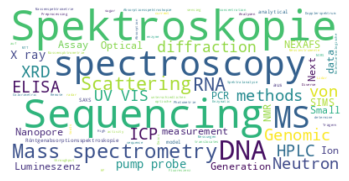

In [65]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
wc_svg = wordcloud.to_svg()

In [ ]:
wordcloud.height

In [76]:
svg_pane = pn.pane.SVG(wc_svg, width=wordcloud.width, height=wordcloud.height)

svg_pane

SVG(str, height=200, sizing_mode='fixed', width=400)

In [70]:
a = wordcloud.words_

In [71]:
a

{'Spektroskopie': 1.0,
 'Sequencing': 0.9230769230769231,
 'spectroscopy': 0.6923076923076923,
 'MS': 0.5384615384615384,
 'DNA': 0.38461538461538464,
 'Mass spectrometry': 0.38461538461538464,
 'RNA': 0.3076923076923077,
 'Scattering': 0.3076923076923077,
 'XRD': 0.23076923076923078,
 'methods': 0.23076923076923078,
 'ELISA': 0.23076923076923078,
 'ICP': 0.23076923076923078,
 'HPLC': 0.23076923076923078,
 'von': 0.23076923076923078,
 'Genomic': 0.23076923076923078,
 'Neutron': 0.23076923076923078,
 'diffraction': 0.23076923076923078,
 'UV VIS': 0.23076923076923078,
 'pump probe': 0.23076923076923078,
 'X ray': 0.23076923076923078,
 'data': 0.15384615384615385,
 'Lumineszenz': 0.15384615384615385,
 'Nanopore': 0.15384615384615385,
 'measurement': 0.15384615384615385,
 'PCR': 0.15384615384615385,
 'Assay': 0.15384615384615385,
 'Next': 0.15384615384615385,
 'Generation': 0.15384615384615385,
 'Optical': 0.15384615384615385,
 'SIMS': 0.15384615384615385,
 'Ion': 0.15384615384615385,
 'NE

In [ ]:
df = filter_dataframe(survey_data, include=["researchArea"]+method_include+data_get_methods_spec, exclude=method_exclude)


In [ ]:
# We want a better mapping of words, i.e words belonging together should not be split, others should... but this is though
# Also there is a german and english mix, so we would need to translate, the automatic translation is not so ultra good for these special words
# Also the mapping should not be case sensitive.

In [86]:
import re

In [97]:
reg = r"\w[\w']+"#r"\w+"
a = re.compile(reg, re.IGNORECASE)
w_txt = "Ration+Sputtering+wet chemistry+Peptidsynthese+qPCR+Zerkleinern, Fest-Flüssig-Trennung, Trocknen+Colloid preparation+field-based monitoring+script-based postprocessing +regression analysis+Manual measurements/observations in the field+Multivariate cluster analysis+Leitfrageninterview+Befragungen (Online-Umfragen, Fragebogenstudien, Interviews)+Statistical analyses+Befragung im Interview, selbstauszufüllende Fragebögen+health examinations+Questionnaires+Fragebögen, Scores+Systematic Review+online surveys+digital long-term surveys+Interview+Erhebung mit Applikation+Cohort analysis+statistical testing+Sortierung durch statische, nicht-lernende Algorithmen (z.B. string matching mit regexp)+Statistical techniques for association analysis+Interviews and questionnaires+statistische Analyse von Messwerten+User experience surveys+questionnaries+Clinician Ratings+LimeSurvey+Fragebogendaten+Weibull statistics+Umfrage zu erfahrenen Szenarios einer Studie (Likert Skala)+Surveys+Umfragen+standardisierte Fragebögen+Survey+Online-Befragung+Befragungen+Interviews (Audio, schriftliche Notizen)".replace('$', ' ')
#w_txt.split()
found = a.findall(w_txt)

In [100]:
from translate import Translator
translator = Translator(to_lang="english", from_lang="german")

In [104]:
trans_w = []
for word in found:
    print(word)
    print(translator.translate(word))# for word in found]
    try:
        trans = translator.translate(word)
    except Exception as er:
        trans_w.append(word)
        continue
    trans_w.append(trans)

Ration
ration
Sputtering
Ion beam sputtering system
wet
wet
chemistry
Chemistry
Peptidsynthese
Peptide Synthesis, Solid Phase
qPCR
qPCR+
Zerkleinern
Comminution
Fest
Feast
Flüssig
Liquid
Trennung
Separation
Trocknen
Drying
Colloid
Colloid Poly.
preparation
preparation
field
field
based
Based
monitoring
monitoring
script
script
based
Based
postprocessing
Nachbearbeitung
regression
Regression
analysis
Analysis
Manual
Manual
measurements
Measurements
observations
Observations
in
in
the
the
field
field
Multivariate
Multivariate statistics
cluster
Cluster
analysis
Analysis
Leitfrageninterview


RuntimeError: generator raised StopIteration

In [118]:

keys = list(HCS_colnamesDict.keys())
for key in surveydata.keys():
    if key not in keys:
        print(key)

id
interviewtime/_
lastpage/_
RDMPR5/_
submitdate/_


In [119]:
surveydata['RSDP4/_'] #dataGatherTime

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
626   NaN
627   NaN
628   NaN
629   NaN
630   NaN
Name: RSDP4/_, Length: 631, dtype: float64

In [141]:
a = surveydata['PERBG3/_'].value_counts()
a

Engineering Science    214
Physics                159
Life Science            91
Earth Science           62
Chemistry               33
Psychology              16
Mathematics              7
Name: PERBG3/_, dtype: int64

In [131]:
a.keys()

Index(['Principal Investigator', 'Technical Staff', 'Research Associate',
       'Postdoc', 'Other'],
      dtype='object')

In [121]:
["2", "researchArea"]+ ["method_include"]

['2', 'researchArea', 'method_include']

In [126]:
HCS_colnamesDict = {
        "PERBG1/_":"centerAffiliation",
        "PERBG1/other":"centerAffiliation_other",
        "PERBG2/_":"researchFieldHGF",
        "PERBG3/_": "researchArea",
        "PERBG3/other":"researchArea_other",
        "PERBG3ING/_":"researchAreaING",
        "PERBG3ING/other":"researchAreaING_other",
        "PERBG3GEO/_":"researchAreaGEO",
        "PERBG3GEO/other":"researchAreaGEO_other",
        "PERBG3MATH/_":"researchAreaMATH",
        "PERBG3MATH/other":"researchAreaMATH_other",
        "PERBG3PHYS/_":"researchAreaPHYS",
        "PERBG3PHYS/other":"researchAreaPHYS_other",
        "PERBG3LIFE/_":"researchAreaLIFE",
        "PERBG3LIFE/other":"researchAreaLIFE_other",
        "PERBG3BIO/_":"researchAreaBIO",
        "PERBG3BIO/other":"researchAreaBIO_other",
        "PERBG3MED/_":"researchAreaMED",
        "PERBG3MED/other":"researchAreaMED_other",
        "PERBG3AGRI/_":"researchAreaAGRI",
        "PERBG3AGRI/other":"researchAreaAGRI_other",
        "PERBG3PSYCH/_":"researchAreaPSYCH",
        "PERBG3PSYCH/other":"researchAreaPSYCH_other",
        "PERBG3CHEM/_":"researchAreaCHEM",
        "PERBG3CHEM/other":"researchAreaCHEM_other",
        "PERBG4/_":"yearsInResearch",
        "PERBG6/_":"careerLevel",
        "PERBG6/other":"careerLevel_other",
        "PERBG7/_":"orcid",
        "PERBG8/_":"fairFamiliarity",
        "RSDP1/1A2":"dataOrigin_MeasVsSim",
        "RSDP1/3A4":"dataOrigin_SelvVsReuse",
        "RSDP1b/1":"dataAmount_lsf",
        "RSDP1c/1":"lsfIdent_1",
        "RSDP1c/2":"lsfIdent_2",
        "RSDP1c/3":"lsfIdent_3",
        "RSDP1c/4":"lsfIdent_4",
        "RSDP1c/5":"lsfIdent_5",
        "RSDP1c/6":"lsfIdent_6",
        "RSDP1c/7":"lsfIdent_7",
        "RSDP1c/8":"lsfIdent_8",
        "RSDP1c/9":"lsfIdent_9",
        "RSDP1c/10":"lsfIdent_10",
        "RSDP1c/11":"lsfIdent_11",
        "RSDP1c/other":"lsfIdent_other",
        "RSDP2/1":"dataGenMethod_1",
        "RSDP2/2":"dataGenMethod_2",
        "RSDP2/3":"dataGenMethod_3",
        "RSDP2/4":"dataGenMethod_4",
        "RSDP2/5":"dataGenMethod_5",
        "RSDP2/6":"dataGenMethod_6",
        "RSDP2/other":"dataGenMethod_other",
        "RSDP2b/1-1":"dataGenMethodSpec_1_1",
        "RSDP2b/1-2":"dataGenMethodSpec_1_2",
        "RSDP2b/1-3":"dataGenMethodSpec_1_3",
        "RSDP2b/2-1":"dataGenMethodSpec_2_1",
        "RSDP2b/2-2":"dataGenMethodSpec_2_2",
        "RSDP2b/2-3":"dataGenMethodSpec_2_3",
        "RSDP2b/3-1":"dataGenMethodSpec_3_1",
        "RSDP2b/3-2":"dataGenMethodSpec_3_2",
        "RSDP2b/3-3":"dataGenMethodSpec_3_3",
        "RSDP2b/4-1":"dataGenMethodSpec_4_1",
        "RSDP2b/4-2":"dataGenMethodSpec_4_2",
        "RSDP2b/4-3":"dataGenMethodSpec_4_3",
        "RSDP2b/5-1":"dataGenMethodSpec_5_1",
        "RSDP2b/5-2":"dataGenMethodSpec_5_2",
        "RSDP2b/5-3":"dataGenMethodSpec_5_3",
        "RSDP2b/6-1":"dataGenMethodSpec_6_1",
        "RSDP2b/6-2":"dataGenMethodSpec_6_2",
        "RSDP2b/6-3":"dataGenMethodSpec_6_3",
        "RSDP2b/7-1":"dataGenMethodSpec_7_1",
        "RSDP2b/7-2":"dataGenMethodSpec_7_2",
        "RSDP2b/7-3":"dataGenMethodSpec_7_3",
        "RSDP3/1":"dataFormats_1",
        "RSDP3/2":"dataFormats_2",
        "RSDP3/3":"dataFormats_3",
        "RSDP3/4":"dataFormats_4",
        "RSDP3/5":"dataFormats_5",
        "RSDP3/6":"dataFormats_6",
        "RSDP3/7":"dataFormats_7",
        "RSDP3/8":"dataFormats_8",
        "RSDP3/9":"dataFormats_9",
        "RSDP3/10":"dataFormats_10",
        "RSDP3/11":"dataFormats_11",
        "RSDP3/12":"dataFormats_12",
        "RSDP3/13":"dataFormats_13",
        "RSDP3/14":"dataFormats_14",
        "RSDP3/15":"dataFormats_15",
        "RSDP3/other":"dataFormats_other",
        "RSDP7/_":"dataInPublication",
        "RSDP4/_":"dataGatherTime",
        "RSDP8/_":"experimentDuration_sub",
        "RSDP11/_":"dataAnalDuration_sub",
        "RSDP10/_":"longtermStorage",
        "DTPUB6/1":"pubAmount",
        "DTPUB1b/1":"pubMethod_1",
        "DTPUB1b/2":"pubMethod_2",
        "DTPUB1b/3":"pubMethod_3",
        "DTPUB1b/other":"pubMethod_other",
        "DTPUB5/1":"pubRepo_1",
        "DTPUB5/2":"pubRepo_2",
        "DTPUB5/3":"pubRepo_3",
        "DTPUB5/4":"pubRepo_4",
        "DTPUB5/5":"pubRepo_5",
        "DTPUB3/1":"pubMotivation_1",
        "DTPUB3/2":"pubMotivation_2",
        "DTPUB3/3":"pubMotivation_3",
        "DTPUB3/4":"pubMotivation_4",
        "DTPUB3/5":"pubMotivation_5",
        "DTPUB3/6":"pubMotivation_6",
        "DTPUB3/7":"pubMotivation_7",
        "DTPUB3/other":"pubMotivation_other",
        "DTPUB4a/0":"pubObstaclesA_0",
        "DTPUB4a/1":"pubObstaclesA_1",
        "DTPUB4a/2":"pubObstaclesA_2",
        "DTPUB4a/3":"pubObstaclesA_3",
        "DTPUB4a/4":"pubObstaclesA_4",
        "DTPUB4a/5":"pubObstaclesA_5",
        "DTPUB4a/6":"pubObstaclesA_6",
        "DTPUB4a/7":"pubObstaclesA_7",
        "DTPUB4a/other":"pubObstaclesA_other",
        "DTPUB4b/0":"pubObstaclesB_0",
        "DTPUB4b/1":"pubObstaclesB_1",
        "DTPUB4b/2":"pubObstaclesB_2",
        "DTPUB4b/3":"pubObstaclesB_3",
        "DTPUB4b/4":"pubObstaclesB_4",
        "DTPUB4b/5":"pubObstaclesB_5",
        "DTPUB4b/6":"pubObstaclesB_6",
        "DTPUB4b/7":"pubObstaclesB_7",
        "DTPUB4b/other":"pubObstaclesB_other",
        "RDMPR1/0":"dataStorage_0",
        "RDMPR1/1":"dataStorage_1",
        "RDMPR1/2":"dataStorage_2",
        "RDMPR1/3":"dataStorage_3",
        "RDMPR1/other":"dataStorage_other",
        "RDMPR3/0":"docMethod_0",
        "RDMPR3/1":"docMethod_1",
        "RDMPR3/2":"docMethod_2",
        "RDMPR3/3":"docMethod_3",
        "RDMPR3/other":"docMethod_other",
        "RDMPR7/2":"docMetadata_2",
        "RDMPR7/3":"docMetadata_3",
        "RDMPR7/4":"docMetadata_4",
        "RDMPR7/5":"docMetadata_5",
        "RDMPR7/6":"docMetadata_6",
        "RDMPR7/7":"docMetadata_7",
        "RDMPR7/8":"docMetadata_8",
        "RDMPR7/9":"docMetadata_9",
        "RDMPR7/other":"docMetadata_other",
        "RDMPR8/2":"docDigital_2",
        "RDMPR8/3":"docDigital_3",
        "RDMPR8/4":"docDigital_4",
        "RDMPR8/5":"docDigital_5",
        "RDMPR8/6":"docDigital_6",
        "RDMPR8/7":"docDigital_7",
        "RDMPR8/8":"docDigital_8",
        "RDMPR8/9":"docDigital_9",
        "RDMPR8/10":"docDigital_other",
        "RDMPR9/2":"docAuto_2",
        "RDMPR9/3":"docAuto_3",
        "RDMPR9/4":"docAuto_4",
        "RDMPR9/5":"docAuto_5",
        "RDMPR9/6":"docAuto_6",
        "RDMPR9/7":"docAuto_7",
        "RDMPR9/8":"docAuto_8",
        "RDMPR9/9":"docAuto_9",
        "RDMPR9/10":"docAuto_other",
        "RDMPR4/_":"docStructured",
        "RDMPR5/_":"docDefSchema",
        "DTPUB7/0":"pubMetadata_0",
        "DTPUB7/1":"pubMetadata_1",
        "DTPUB7/21":"pubMetadata_21",
        "DTPUB7/22":"pubMetadata_22",
        "DTPUB7/23":"pubMetadata_23",
        "DTPUB7/24":"pubMetadata_24",
        "DTPUB7/31":"pubMetadata_31",
        "DTPUB7/32":"pubMetadata_32",
        "DTPUB7/33":"pubMetadata_33",
        "DTPUB7/41":"pubMetadata_41",
        "DTPUB7/42":"pubMetadata_42",
        "DTPUB7/43":"pubMetadata_43",
        "DTPUB7/44":"pubMetadata_44",
        "DTPUB7/51":"pubMetadata_51",
        "DTPUB7/52":"pubMetadata_52",
        "DTPUB7/61":"pubMetadata_61",
        "DTPUB7/62":"pubMetadata_62",
        "DTPUB7/71":"pubMetadata_71",
        "DTPUB7/72":"pubMetadata_72",
        "DTPUB7/81":"pubMetadata_81",
        "DTPUB7/82":"pubMetadata_82",
        "DTPUB7/83":"pubMetadata_83",
        "DTPUB7/91":"pubMetadata_91",
        "DTPUB7/92":"pubMetadata_92",
        "DTPUB7/93":"pubMetadata_93",
        "DTPUB7/other":"pubMetadata_other",
        "RDMPR6/1":"docStandards_1",
        "RDMPR6/2":"docStandards_2",
        "RDMPR6/3":"docStandards_3",
        "RDMPR6/4":"docStandards_4",
        "RDMPR6/5":"docStandards_5",
        "RDMPR6/6":"docStandards_6",
        "RDMPR6/7":"docStandards_7",
        "RDMPR6/8":"docStandards_8",
        "RDMPR6/9":"docStandards_9",
        "RDMPR6/10":"docStandards_10",
        "RDMPR6/11":"docStandards_11",
        "RDMPR6/12":"docStandards_12",
        "RDMPR6/13":"docStandards_13",
        "RDMPR6/14":"docStandards_14",
        "RDMPR6/15":"docStandards_15",
        "RDMPR6/16":"docStandards_16",
        "RDMPR6/17":"docStandards_17",
        "RDMPR6/18":"docStandards_18",
        "RDMPR6/19":"docStandards_19",
        "RDMPR6/20":"docStandards_20",
        "RDMPR6/21":"docStandards_21",
        "RDMPR6/22":"docStandards_22",
        "RDMPR6/23":"docStandards_23",
        "RDMPR6/24":"docStandards_24",
        "RDMPR6/25":"docStandards_25",
        "RDMPR6/26":"docStandards_26",
        "RDMPR6/other":"docStandards_other",
        "RDMPR10/1":"software_1",
        "RDMPR10/2":"software_2",
        "RDMPR10/3":"software_3",
        "RDMPR12/0":"docMotivation_0",
        "RDMPR12/1":"docMotivation_1",
        "RDMPR12/2":"docMotivation_2",
        "RDMPR12/3":"docMotivation_3",
        "RDMPR12/4":"docMotivation_4",
        "RDMPR12/5":"docMotivation_5",
        "RDMPR12/6":"docMotivation_6",
        "RDMPR12/other":"docMotivation_other",
        "RDMPR11/0":"docObstacles_0",
        "RDMPR11/1":"docObstacles_1",
        "RDMPR11/2":"docObstacles_2",
        "RDMPR11/3":"docObstacles_3",
        "RDMPR11/4":"docObstacles_4",
        "RDMPR11/5":"docObstacles_5",
        "RDMPR11/6":"docObstacles_6",
        "RDMPR11/7":"docObstacles_7",
        "RDMPR11/8":"docObstacles_8",
        "RDMPR11/9":"docObstacles_9",
        "RDMPR11/other":"docObstacles_other",
        "SERVC1/0":"servNeeds_sub_0",
        "SERVC1/1":"servNeeds_sub_1",
        "SERVC1/2":"servNeeds_sub_2",
        "SERVC1/3":"servNeeds_sub_3",
        "SERVC1/4":"servNeeds_sub_4",
        "SERVC1/5":"servNeeds_sub_5",
        "SERVC1/6":"servNeeds_sub_6",
        "SERVC1/7":"servNeeds_sub_7",
        "SERVC1/8":"servNeeds_sub_8",
        "SERVC1/9":"servNeeds_sub_9",
        "SERVC1/other":"servNeeds_sub_other",
        "SERVC2/1":"servFormat_1",
        "SERVC2/2":"servFormat_2",
        "SERVC2/3":"servFormat_3",
        "SERVC2/4":"servFormat_4",
        "SERVC2/5":"servFormat_5",
        "SERVC2/6":"servFormat_6",
        "SERVC3":"feedback"
        }


In [138]:
HCS_MCsubquestions = {}
key_ignore_list = ["yearsInResearch", "careerLevel", "dataInPublication", "experimentDuration_sub", "dataAnalDuration_sub", "dataAmount_lsf", "pubAmount", "dataGatherTime"]
for key in surveydata.keys():
    a = surveydata[key].value_counts()
    #print(a)
    try:
        key_m = HCS_colnamesDict[key]
    except KeyError as er:
        print(er)
        print(key)
        continue
    if key_m in key_ignore_list:
        print(key_m, a)
        print('\n')
        continue
    HCS_MCsubquestions[key_m] = list(a.keys())

'id'
id
pubAmount 0.0      256
10.0      63
5.0       51
50.0      32
25.0      32
30.0      25
20.0      25
100.0     19
40.0      19
15.0      19
90.0      18
80.0      12
70.0      11
75.0      11
60.0      10
95.0       8
35.0       7
85.0       6
55.0       3
65.0       2
45.0       2
Name: DTPUB6/1, dtype: int64


'interviewtime/_'
interviewtime/_
'lastpage/_'
lastpage/_
yearsInResearch More than 10 years    259
7 to 10 years          84
1 to 3 years           74
4 to 6 years           72
Less than 1 year       27
No degree              15
Name: PERBG4/_, dtype: int64


careerLevel Research Associate        224
Principal Investigator    144
Postdoc                   128
PhD candidate              97
Student                    17
Technical Staff             9
Other                       1
Name: PERBG6/_, dtype: int64


dataAnalDuration_sub I don't know    16
As much         14
Less            10
More            10
Name: RSDP11/_, dtype: int64


dataAmount_lsf 0.0      82
100.0    

In [139]:
HCS_MCsubquestions

{'pubMethod_1': [True],
 'pubMethod_2': [True],
 'pubMethod_3': [True],
 'pubMethod_other': ['In repository',
  'Other',
  'Supplementary to journal publication'],
 'pubMotivation_1': [True],
 'pubMotivation_2': [True],
 'pubMotivation_3': [True],
 'pubMotivation_4': [True],
 'pubMotivation_5': [True],
 'pubMotivation_6': [True],
 'pubMotivation_7': [True],
 'pubMotivation_other': ['Guidelines / policies of publishers',
  'Good scientific practice',
  'Reusability',
  'Other',
  'Guidelines/policies of institute/funder'],
 'pubObstaclesA_0': [True],
 'pubObstaclesA_1': [True],
 'pubObstaclesA_2': [True],
 'pubObstaclesA_3': [True],
 'pubObstaclesA_4': [True],
 'pubObstaclesA_5': [True],
 'pubObstaclesA_6': [True],
 'pubObstaclesA_7': [True],
 'pubObstaclesA_other': ['Legal / ethical concerns',
  'Lack of time / personnel',
  'Technical barriers',
  'Technical support needed',
  'Other',
  'Competition',
  'Insufficiently trained',
  'Lack of incentives',
  'No value to others'],
 'pubO

In [150]:
surveydata.keys()

Index(['id', 'DTPUB1b/1', 'DTPUB1b/2', 'DTPUB1b/3', 'DTPUB1b/other',
       'DTPUB3/1', 'DTPUB3/2', 'DTPUB3/3', 'DTPUB3/4', 'DTPUB3/5',
       ...
       'SERVC1/9', 'SERVC1/other', 'SERVC1/0', 'SERVC2/1', 'SERVC2/2',
       'SERVC2/3', 'SERVC2/4', 'SERVC2/5', 'SERVC2/6', 'submitdate/_'],
      dtype='object', length=263)

In [151]:
surveydata['RSDP2/1'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
626     NaN
627    True
628     NaN
629    True
630    True
Name: RSDP2/1, Length: 631, dtype: object

In [156]:
subq = []
key_s = 'RSDP2/'
for key in surveydata.keys():
    if key_s in key:
        subq.append(key)
        subq.sort()

# get category name, replace True with name and False with NAN, or count directly

# write something to visualize several questions.

In [160]:
surveydata[subq[0]].value_counts()

True    157
Name: RSDP2/1, dtype: int64

In [159]:
subq

['RSDP2/1',
 'RSDP2/2',
 'RSDP2/3',
 'RSDP2/4',
 'RSDP2/5',
 'RSDP2/6',
 'RSDP2/other']

In [ ]:
x = 
for sub in subq:
    